## 1. Problem Statement
A real advertising company wants to improve their sales and understand their customers where they are mostly facing issues. The goal of the company is to delight their customers. This data is used only here as an educational purpose not elsewhere.

## 2. About the data
The dataset provided to us consists of two tables: Requests and Survey

<b>Requests Table</b>
<ul>
<li>Customer Country: Country or region customers are reporting issues</li>
<li>Issue Code 1: Type of problems reported</li>
<li>Serive Request Id:Unique Identifier of issue also used in survey table</li>
<li>Support Center Filter: Whether the issue went through service centers</li>
<li>Support Channel: Means through which customer received support</li>
<li>Ticket Close and Created Date:Time and date issue was created and solved</li>
<li>Vendor Site: Group of support centers solving this issue</li>
<li>Time To Close: Duration taken to solve the issue</li> </ul>
<b>Survey Table</b>
<ul>
<li>Is Issue Resolved = Whether or not the customer issue was resolved</li>
<li>ProductQuality 9pt = Overall Satisfaction Box Score.</li>
<li>ProductQuality 9pt act = Actuals for Overall Satisfaction</li>
<li>QualityOfSupport 9pt = Satisfaction Box Score with support given</li>
<li>QualityOfSupport 9pt act = Actuals for support given</li>
<li>Rep Sat 9Pt = Satisfaction Box Score w/ particular representative service</li>
<li>Rep Sat 9Pt Act = Actuals for satisfaction w/ particular representative service</li>
<li>Service Specialist Efficiency = Box score for how efficient the specialist was</li>
<li>Service Specialist Knowledge = Box score for how knowledgeable the specialist was</li>

<li>Service Specialist Professionalism = Box score for how professional the specialist was</li>

<li>ServiceSpecialistEfficiency act = Actual score for how efficient the specialist was</li>

<li>ServiceSpecialistKnowledge act = Actual score for how knowledgeable the specialist was</li>

<li>ServiceSpecialistProfessionalism act = Actual score for how professional the specialist was</li>

<li>SR Number = Unique Identifier for support ticket; relates table to Requests </li></ul>

## 3. Objectives
The objective of this project is to identify and answer the following questions:
<ol>
    <li> Identify current trends in customer satisfaction.</li>
    <li> Understand where customer are having issues</li>
    <li> How many customers call in, from where? </li>
    <li> What are the biggest pain points? </li>
    <li> Recommendations for CSAT Targets </li>
    </ol>

In [1]:
#Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')
print('Setup Complete')

Setup Complete


In [2]:
#Read data from excel
data = pd.read_excel('SampleDataSet_CallCenter.xlsx')
data.head()

,Customer Country/Region,Issue Code 1,Service Request Id,Support Center Filter,Support Channel,Ticket Close Date,Ticket Create Date,Vendor - Site,Time To Close
0,United States,Account Access,1278326353,True,Chat,2015-02-01,2015-02-01,Support Center B,0.0
1,United States,Account Access,1278330809,True,Chat,2015-02-01,2015-02-01,Support Center B,0.0
2,India,Accreditation Program,1278348606,True,Chat,2015-02-01,2015-02-01,Support Center B,0.0
3,United States,Ad and Keyword Management,1278345988,True,Chat,2015-02-01,2015-02-01,Support Center B,0.0
4,United States,Ad and Keyword Management,1278344530,True,Chat,2015-02-01,2015-02-01,Support Center B,0.0


In [3]:
print('Information about the data:')
data.info()
print('Shape of the data')
print(data.shape,'\n')

Information about the data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218685 entries, 0 to 218684
Data columns (total 9 columns):
Customer Country/Region    218685 non-null object
Issue Code 1               218685 non-null object
Service Request Id         218685 non-null int64
Support Center Filter      218685 non-null bool
Support Channel            218668 non-null object
Ticket Close Date          218609 non-null datetime64[ns]
Ticket Create Date         218685 non-null datetime64[ns]
Vendor - Site              218685 non-null object
Time To Close              218609 non-null float64
dtypes: bool(1), datetime64[ns](2), float64(1), int64(1), object(4)
memory usage: 13.6+ MB
Shape of the data
(218685, 9) 



In [4]:
#Rename columns for convenience
data = data.rename(columns={'Customer Country/Region':'Country','Issue Code 1':'Issue','Support Channel':'Channel','Time To Close':'Duration'})

In [5]:
#Replace no value text as NaN
data['Country'] = data.Country.replace('[No Value]',np.NaN)
data.isna().sum()

Country                  3298
Issue                       0
Service Request Id          0
Support Center Filter       0
Channel                    17
Ticket Close Date          76
Ticket Create Date          0
Vendor - Site               0
Duration                   76
dtype: int64

In [6]:
#Function for barplots
def plotly_bar(df,title):
    data_point = [go.Bar(
    x = df.index,
    y = df.values,
    )]
    layout = go.Layout(title=title)
    return plotly.offline.iplot({'data':data_point,'layout':layout})
#Function for lineplots
def lineplot(df,title,marker,color):
    plt.figure(figsize=(20,8))
    sns.lineplot(x=df.index,y=df.values,marker=marker,color=color)
    plt.title(title,fontsize=20)
    plt.show()
#Function for donuts
def plotly_donut(df,title):
    data_point = [go.Pie(
    labels = df.index,
    values = df.values,
    hole = 0.6)]
    layout = go.Layout(title=title)
    return plotly.offline.iplot({'data':data_point,'layout':layout})

## 4. Where most of the problems occur?

In [7]:
#Total number of countries
num_countries = len(data.Country.unique())
#Frequencies of problem reported by each country
country_count = data.Country.value_counts().sort_values(ascending=False).head(20)
#Plot the respective data
plotly_bar(country_count,title = "Countries with most problems")

<i> It is evident that the <b>United States</b> has the significant number of problems reported to the call center followed by India and UK amongst the <b>212 countries</b>. It clearly explains that U.S has majority of customers compared to other countries.</i>

## 5.What problems are faced predominantly?

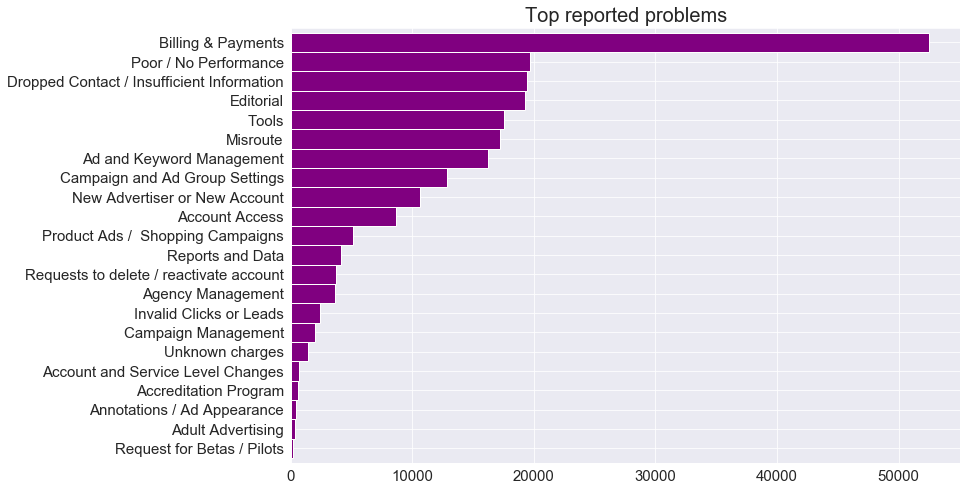

In [8]:
#Total number of issues
num_issues = len(data.Issue.unique())
#Frequency of issues reported
issue_count = data.Issue.value_counts().sort_values().tail(22)
#Plot the respective data
plt.figure(figsize=(12,8))
plt.title('Top reported problems',fontsize=20)
issue_count.plot.barh(width=1,fontsize=15,color='purple')
plt.show()

<i>According to the graph presented above, majority of the clients have issues related to <b>Billing and Payments</b> with substantial numbers. Besides this, issues like poor performance, editorial and misroute have also been reported frequently. </i>

## 6. How are these reported to the company?

From the data given to us, we know that there are three communication media between our customer and service representative particularly Chat, Inbound Call and Email. However, we are not sure through which medium most of the reported issues are solved. Let's find out!

In [9]:
#Count number of issues solved through each channel in percentage
channel_count = data['Channel'].value_counts(normalize=True)
#Plot the data
plotly_bar(channel_count,title='Support Channels')

<i> This clearly shows that maximum problems where handled by <b>Chat</b> with about <b>57%</b> followed by inbound calls and email. Customers having general inquiries ususally tend to use this service whereas inbound calls could be customers with disrupted service that require prompt response. </i>

## 7.Can issues be solved online?
While chat being the most useful connective tool amongst others,what amount of problems where actually solved by those representatives? Did the customers had to visit the service center at last?

In [10]:
service_center = data['Support Center Filter'].value_counts(normalize=True)
plotly_donut(service_center,title='Service Center Vs. Online')

<i> Out of all reported problems, <b>52%</b> of the issues were solved online whereas other were transferred to service centers <b>(48%)</b>.Comparatively most of the problems could be solved through the communication media the company has, it's easier to attain efficiency.But we don't have a clear picture whether the issues reported through online services were actually solved.</i>

## 8. Trends of issues over time
Out of 200 thousands observation recorded in year 2015 and 2016, what are the trends of problems reported to the call center? Do they increase over time? What actually affects them?

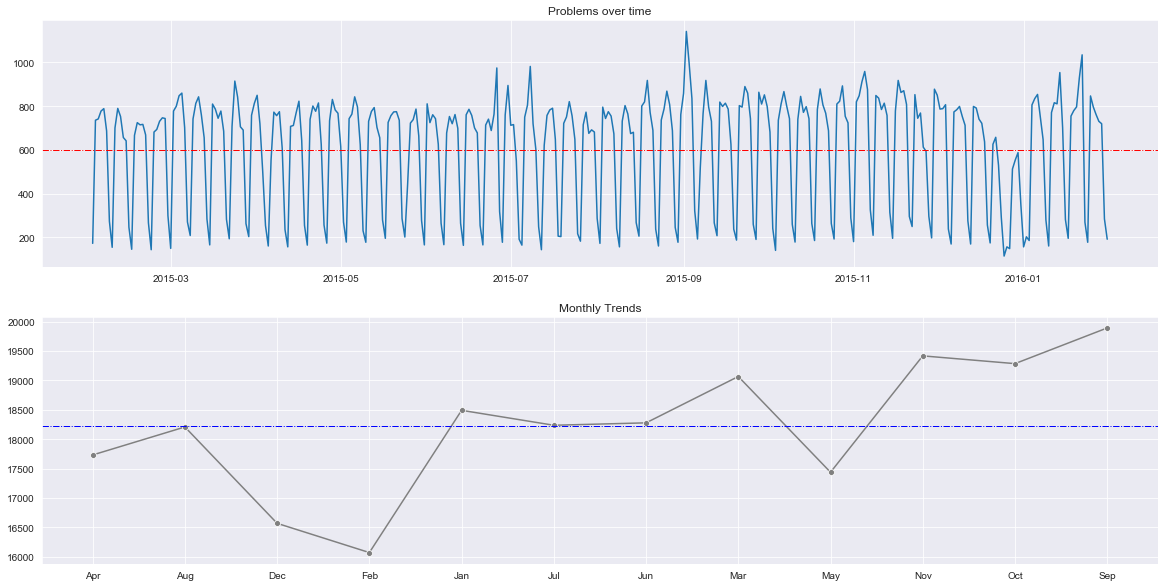

In [11]:
import calendar
issued_date = data['Ticket Create Date'].value_counts()
#Add month as a new column
data['Month'] = data['Ticket Create Date'].dt.month
#Add abbreviation for months
data['Month'] = data['Month'].apply(lambda x : calendar.month_abbr[x])
month_count = data['Month'].value_counts()
fig, (ax1, ax2) = plt.subplots(2,figsize=(20,10))
# Plot and customize first subplot
sns.lineplot(x=issued_date.index,y=issued_date.values,ax=ax1)
ax1.set(title="Problems over time")
ax1.axhline(issued_date.values.mean(), color='red', linewidth=1, linestyle='-.')

# Plot and customize second subplot
sns.lineplot(x=month_count.index,y=month_count.values,ax=ax2, color='gray',marker='o')
ax2.set(title='Monthly Trends')
ax2.axhline(month_count.values.mean(),color='blue',linewidth=1,linestyle='-.')
plt.show()

<i> During these years, the highest problem reported was on the month of <b>September,2015</b>.Looking at the trend, other time peroid have uniformity of issues with slight increase in the month of <b>July, 2015</b> and <b>January,2016</b>. We can assume that <b>September</b> month might have some techical disturbances which increased the number of calls, chat request or emails.</i>

## 9. Average time to resolve an issue?

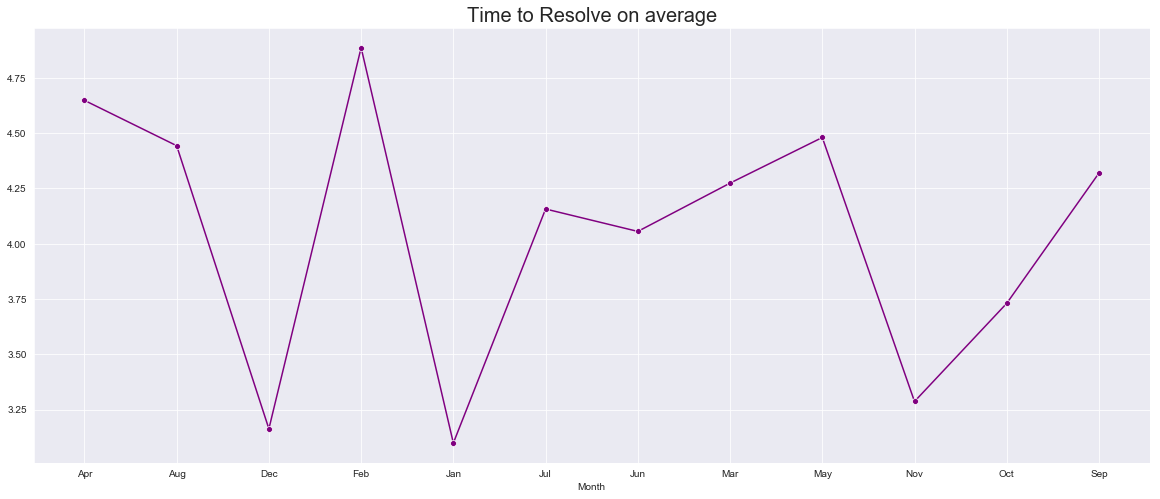

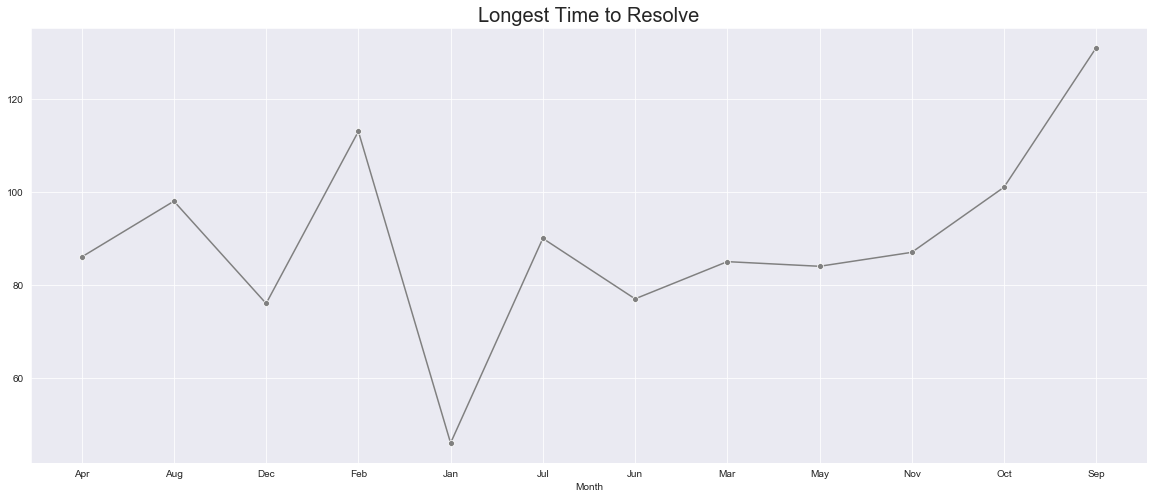

In [12]:
#Average duration 
avg_duration = data.groupby('Month').Duration.mean()
#Plot data
lineplot(avg_duration,title="Time to Resolve on average",marker='o',color='purple')
#Max duration
max_duration = data.groupby('Month').Duration.max()
#Plot data
lineplot(max_duration,title='Longest Time to Resolve',marker='o',color='gray')

<i>From the figure above, we can see that issues in <b>February</b> took more time to resolve on an average although there were more problems reported in <b>September</b>. Along with this, looking at the maximum time taken to resolve an issue was undoubtedly in the month of <b>September</b> due to huge volume of complaints registered.</i>

## 10. Workacholic vendors?

In [13]:
vendor_count = data['Vendor - Site'].value_counts()
plotly_bar(vendor_count,title="Most working Support Center")

<i> Employees working in <b>Support Center B </b> tend be to working more significantly compared to others with more than <b>50K</b> issues handled than the subsequent one. The reason might be the center is nearest to the areas of client's facing the most issues or they might have good number of employees. We cannot justify since we do not have this information about the number of people working under the vendors or where they are located.</i>

## 11. What were client's reactions after support?

In [14]:
survey_data = pd.read_excel('SampleDataSet_CallCenter.xlsx',sheet_name='Survey')
survey_data.head()

,Is Issue Resolved,ProductQuality 9pt,ProductQuality 9pt act,QualityOfSupport 9pt,QualityOfSupport 9pt act,Rep Sat 9Pt,Rep Sat 9Pt Act,Service Specialist Efficiency,Service Specialist Knowledge,Service Specialist Professionalism,ServiceSpecialistEfficiency act,ServiceSpecialistKnowledge act,ServiceSpecialistProfessionalism act,SR Number
0,no,Bottom Box,1,Bottom Box,1,Bottom Box,1,NaN,Bottom Box,Bottom Box,NaN,1,1,1274788470
1,no,Bottom Box,1,Bottom Box,1,Bottom Box,1,NaN,Bottom Box,Bottom Box,NaN,1,1,1277904302
2,no,Bottom Box,1,Bottom Box,1,Bottom Box,1,NaN,Bottom Box,Bottom Box,NaN,1,1,1278565479
3,no,Bottom Box,1,Bottom Box,1,Bottom Box,1,NaN,Bottom Box,Bottom Box,NaN,1,1,1279120285
4,no,Bottom Box,1,Bottom Box,1,Bottom Box,1,NaN,Bottom Box,Bottom Box,NaN,1,1,1279186280


In [15]:
def rename_column(data):
    old_columns = data.columns
    new_column  = []
    for col in old_columns:
        text = col.split()
        if len(text)==2:
            new_column.append(text[0]+'_'+text[1])   
        else:
            new_column.append(text[0]+'_'+text[1]+'_'+text[2])
    rename_col = dict(zip(old_columns,new_column))
    new_data = data.rename(columns = rename_col)
    return new_data
data_survey = rename_column(survey_data)


## 12. Are reported issues solved?

In [16]:
resolved_count = data_survey['Is_Issue_Resolved'].value_counts(normalize=True)
plotly_donut(resolved_count,title="Solved Vs. Unsolved")

<i>This data was collected as a feedback from the clients after they were handled by the representatives. From the above diagram, we can conclude that about <b>89%</b> of the problems reported were resolved whereas <b> 11% </b>could not be solved by the support center staffs.</i>

## 13. What were client's response to product quality?

In [17]:
data_survey['ProductQuality_9pt_act'] = data_survey['ProductQuality_9pt_act'].replace("Don't know/refused",np.NaN)
data_survey['ProductQuality_9pt_act'] = data_survey['ProductQuality_9pt_act'].replace("Not Received",np.NaN)
mean_pro = round(data_survey['ProductQuality_9pt_act'].mean())
data_survey['ProductQuality_9pt_act'] = data_survey['ProductQuality_9pt_act'].fillna(mean_pro)

In [18]:
trace0 =go.Box(y=data_survey['ProductQuality_9pt_act'][data_survey['Is_Issue_Resolved']=="yes"],name="Issue Resolved")
trace1 = go.Box(y=data_survey['ProductQuality_9pt_act'][data_survey['Is_Issue_Resolved']=="no"],name="Issue Not Resolved")
layout = go.Layout(title="Product Quality Responses ")
data_point = [trace0,trace1]
plotly.offline.iplot({'data':data_point,'layout':layout})

<i> Customers whose issues were resolved were much satisfied about the quality of the product with a median scale of <b> 8 </b> whereas there were unsatisfied number of customer with a lower response on product quality.</i>

## 14. What about the quality of service? 

In [19]:
trace0 =go.Box(y=data_survey['QualityOfSupport_9pt_act'][data_survey['Is_Issue_Resolved']=="yes"],name="Issue Resolved")
trace1 = go.Box(y=data_survey['QualityOfSupport_9pt_act'][data_survey['Is_Issue_Resolved']=="no"],name="Issue Not Resolved")
layout = go.Layout(title="Service Quality Responses ")
data_point = [trace0,trace1]
plotly.offline.iplot({'data':data_point,'layout':layout})

<i> Looking at the scale from 1 to 9, customers rated the service with a median of <b> 9 </b> after their reported issues were resolved. However, it is obvious that poeple who were unsatisfied with the service had problems that could not be solved by the support representatives.</i>

## 15. Service in terms of Efficiency, Knowledge and Professionalism

In [20]:
def text_to_nan(df,col):
    df[col] = df[col].replace("Don't know/refused",np.NaN)
    mean = round(df[col].mean())
    df[col] = df[col].fillna(mean)
def plotly_3_box(df,col1,col2,col3,name,title):
    trace0 = go.Box(y=df[col1],name = 'Efficiency')
    trace1 = go.Box(y=df[col2],name='Knowledge')
    trace2 = go.Box(y = df[col3],name = 'Professionalism')
    data = [trace0,trace1,trace2]
    layout = go.Layout(title=title)
    return plotly.offline.iplot({'data':data,'layout':layout})

In [21]:
text_to_nan(data_survey,'ServiceSpecialistEfficiency_act')
text_to_nan(data_survey,'ServiceSpecialistKnowledge_act')
text_to_nan(data_survey,'ServiceSpecialistProfessionalism_act')
plotly_3_box(data_survey,'ServiceSpecialistEfficiency_act','ServiceSpecialistKnowledge_act','ServiceSpecialistProfessionalism_act',None,'Efficiency Vs Knowledge Vs Professionalism')

<i>In comparison between three factors: <b>Efficiency, Knowledge</b> and <b>Professionalism </b> of the representative handling the customers showed impressive results. Employees were far more efficient in their work, had proper knowledge about their job roles and were expert in performing them. Therefore, majority of customers were satisfied with the support services. </i>

## 16. Diving a bit deeper

We were able to identify successfully some of the issues that were reported frequently to the support centers and how satisfied were the customers.Including the outcome of every communication mediums and vendors there is more to explore.

In [22]:
#Subset data
survey_resp = data_survey[['Is_Issue_Resolved','SR_Number','QualityOfSupport_9pt_act']]
req_data = data[['Service Request Id','Country','Issue','Support Center Filter','Channel','Vendor - Site','Duration']]
#Rename column
req_data = req_data.rename(columns={'Service Request Id':'SR_Number'})

In [23]:
combined = pd.merge(req_data,survey_resp,how='inner',on='SR_Number')
combined.sample(n=5)

,SR_Number,Country,Issue,Support Center Filter,Channel,Vendor - Site,Duration,Is_Issue_Resolved,QualityOfSupport_9pt_act
3481,1302258009,United States,Tools,True,Chat,Support Center B,13.0,no,4
3826,1305517385,France,Billing & Payments,False,Inbound call,Support Center D,0.0,yes,9
2732,1296137966,India,Billing & Payments,True,Email,Support Center B,3.0,yes,9
3878,1305845436,Denmark,Poor / No Performance,False,Chat,Support Center D,4.0,yes,9
6,1278479999,Singapore,Reports and Data,False,Chat,Support Center A,0.0,no,4


## 17. Which issues remain unsolved most?

In [24]:
#Generate crosstab for issues as yes or no
issue_resolved= pd.crosstab(combined['Issue'],combined['Is_Issue_Resolved'])
#Proportion of the above data
issue = issue_resolved.div(issue_resolved.sum(1).astype(float),axis=0).sort_index()
#Plot the data
fig = go.Figure()
fig.add_trace(go.Bar(x = issue.index,
               y = issue['no'].values,name = "No",width=1))
fig.add_trace(go.Bar(x = issue.index,
               y = issue['yes'].values,name='Yes',width=1))
fig.update_layout(barmode='stack',title="Most Unsolved Issues")

<i> It seems that most of the unsolved problems were <b>Native Ads, Dropped Contacts</b> and <b>Misroutes</b> which do not concern us but there are issues like advertisements and accounting queries that could be solved by the support representatives.</i>

## 18. Which channels appear to be problem solvers?

In [94]:
support_channel = pd.crosstab(combined['Channel'],combined['Support Center Filter'])
support_channel = support_channel.div(support_channel.sum(1).astype(float),axis=0)
fig1 = go.Figure()
fig1.add_trace(go.Bar(x = support_channel.index,
               y = support_channel[False].values,name = "Online",width=0.5))
fig1.add_trace(go.Bar(x = support_channel.index,
               y = support_channel[True].values,name='Service Center',width=0.5))
display(fig1.update_layout(barmode='stack',title="Problem solving channels"))
channel_resolve = pd.crosstab(combined['Channel'],combined['Is_Issue_Resolved']).sort_values('Channel',ascending=False)

channel_resolved = channel_resolve.div(channel_resolve.sum(1).astype(float),axis=0)

#Plot the data
fig2 = go.Figure()
fig2.add_trace(go.Bar(x = channel_resolved.index,
               y = channel_resolved['no'].values,name = "Unsolved",width=0.5))
fig2.add_trace(go.Bar(x = channel_resolved.index,
               y = channel_resolved['yes'].values,name='Solved',width=0.5))
fig2.update_layout(barmode='stack',title="Actual Problem Solvers")

<i>From the above diagram, we can clearly see that about <b>65%</b> of the problems handled by Chat Representatives were forwarded to service centers whereas other service channels responded well and resolved the issue through phone support or email. </i>

## 19. Best performing Support Centers?

In [95]:
vendor_resolve = pd.crosstab(combined['Vendor - Site'],combined['Is_Issue_Resolved'])
vendor_resolved = vendor_resolve.div(vendor_resolve.sum(1).astype('float'),axis=0)
fig2 = go.Figure()
fig2.add_trace(go.Bar(x = vendor_resolved.index,
               y = vendor_resolved['no'].values,name = "Unsolved",width=0.5))
fig2.add_trace(go.Bar(x = vendor_resolved.index,
               y = vendor_resolved['yes'].values,name='Solved',width=0.5))
fig2.update_layout(barmode='stack',title="Effective Support Vendor")

<i> Out of every inquiries handled by the support centers, Support Center C appears to be the best performing vendor due to less number of reported problems. However, it's actually <b> Support Center D </b> with an impressive result as <b> 91% </b> of the problems were solved followed by Support Center A with 89%. Finally, Support Center B appears to have some amount unresolved issues due to increaing number of problems reported than others.</i>

## 20. Does duration affect solving problems?

In [120]:
trace0 =go.Box(y=combined['Duration'][data_survey['Is_Issue_Resolved']=="yes"],name="Issue Resolved")
trace1 = go.Box(y=combined['Duration'][combined['Is_Issue_Resolved']=="no"],name="Issue Not Resolved")
layout = go.Layout(title="Duration Vs Issues ")
data_point = [trace0,trace1]
plotly.offline.iplot({'data':data_point,'layout':layout})

<i>A problem that required more time does not mean it cannot be resolved whereas some issues that could not be solved requries even much lesser time. So, this does not affect the overall outcome.</i>

## Conclusions and Recommendations

In overall, the advertising company is performing pretty well. It has attained global customer satisfaction of 8 on a scale of 1-9. The company seems to have more customers from United States due to increased number of issues with mostly inquiring for billing and payments. These issues were mostly reported via chat services to Support Center B and almost 89 percent of the problems were solved by the representatives. This is an impressive result with satisfying customers with great levels of efficiency, knowledge and professionalism. However, there were issues that remained unsolved and also an imbalance in the volume of problems received by different vendors. In order to obtain high level efficiency unresolved issues percentage must be reduced and the company must focus on frequently reported issues that could not be solved and distribution of works across all centers. 